In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [112]:
df_train = pd.read_csv('customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('customer_churn_dataset-testing-master.csv')
df = pd.concat([df_train, df_test])

## Preprocessing

In [113]:
def removeCustomerID(df: pd.DataFrame):
    df.drop(columns='CustomerID', inplace=True)

def oneHotEncoding(df: pd.DataFrame):
    return pd.get_dummies(df, columns=['Gender', 'Subscription Type', 'Contract Length'])

def removeNaN(df: pd.DataFrame):
    df.dropna(how='all', inplace=True)

# Dropping "Customer ID" column as it is not needed
removeCustomerID(df)
removeCustomerID(df_test)
removeCustomerID(df_train)

#Dropping all invalid rows (NaN)
removeNaN(df)
removeNaN(df_test)
removeNaN(df_train)

#One-Hot encoding
df_train = oneHotEncoding(df_train)
df_test = oneHotEncoding(df_test)

#Splitting X and Y
x_train = df_train.drop(columns='Churn')
y_train = df_train.get('Churn')
x_test = df_test.drop(columns='Churn')
y_true = df_test.get('Churn')

## Exploratory Data Analysis

Text(0.5, 1.0, 'Contract Length')

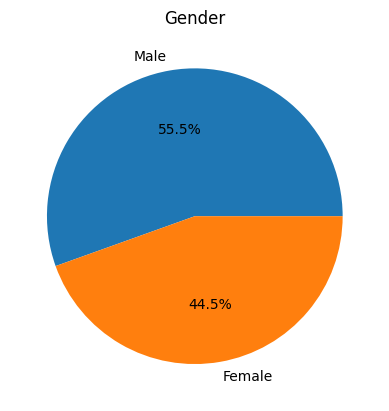

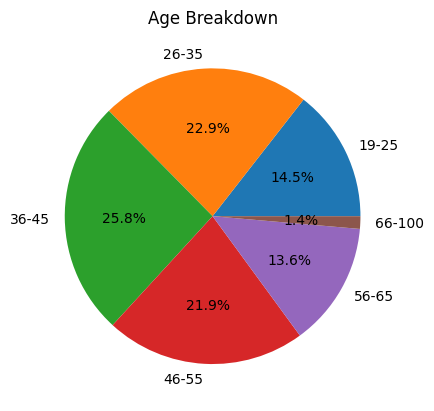

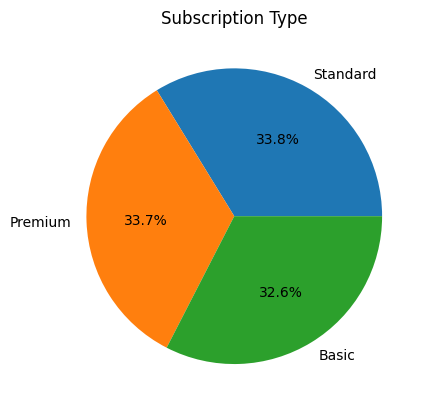

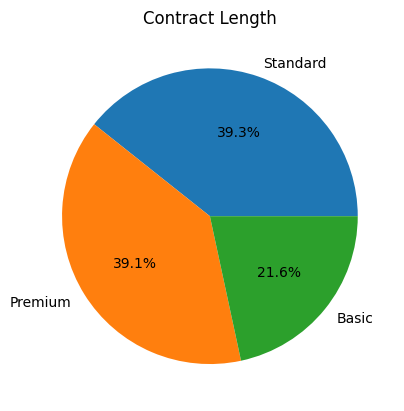

In [114]:
#Gender breakdown
gender_counts = df['Gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
ax.set_title('Gender')

#Age breakdown
age_group_bins = [18, 25, 35, 45, 55, 65, 100]
age_group_labels = ['19-25', '26-35', '36-45', '46-55', '56-65', '66-100'] #Age range 0-18 doesn't exist in the dataset
age_group = pd.cut(df['Age'], bins=age_group_bins, labels=age_group_labels, right=False)
age_group_counts = age_group.value_counts().sort_index()

fig, ax = plt.subplots()
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Age Breakdown')

#Subscription type breakdown
subscription_type_counts = df['Subscription Type'].value_counts()
fig, ax = plt.subplots()
ax.pie(subscription_type_counts, labels=subscription_type_counts.index, autopct='%1.1f%%')
ax.set_title('Subscription Type')

#Contract length breakdwon
contract_length_counts = df['Contract Length'].value_counts()
fig, ax = plt.subplots()
ax.pie(contract_length_counts, labels=subscription_type_counts.index, autopct='%1.1f%%')
ax.set_title('Contract Length')

## Model Training

### Gaussian Naive Bayes

Accuracy: 0.6243048435703855
Precision: 0.5619622018781187
Recall: 0.9380841504607614
F1 score: 0.7028687265802568


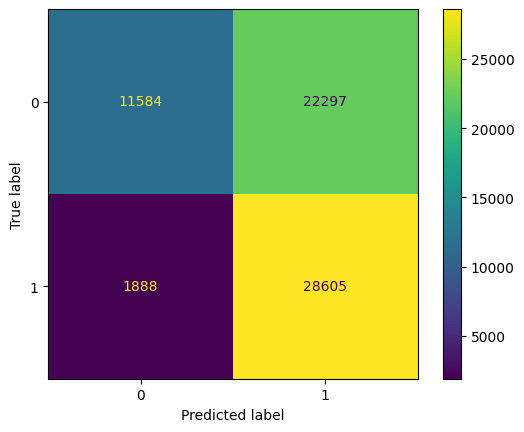

In [115]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1_score}')

display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
)
plt.show()

### Logistic Regression

Accuracy: 0.5711778047037623
Precision: 0.5251025658855434
Recall: 0.9905880038041518
F1 score: 0.6863674062965109


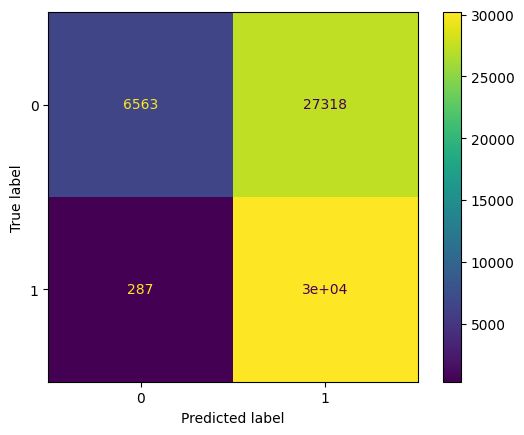

In [116]:
lregression = LogisticRegression(max_iter=1000)
lregression.fit(x_train, y_train)

y_pred = lregression.predict(x_test) #Making predictions on test set to evaluate any possible overfitting

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1_score}')

display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
)
plt.show()

### Decision Tree (Regressor)

Accuracy: 0.5033243234846366
Precision: 0.48813874463037765
Recall: 0.9987210179385433
F1 score: 0.6557638268321831


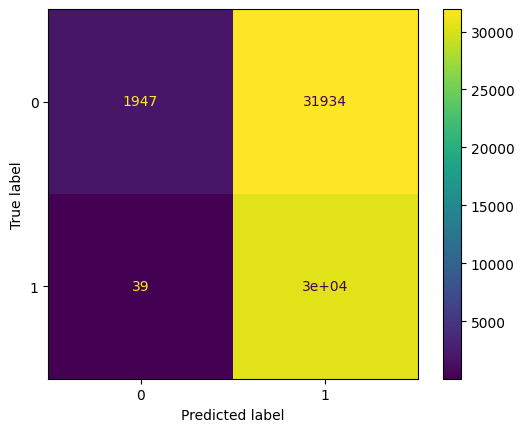

In [117]:
dTree = DecisionTreeRegressor()
dTree.fit(x_train, y_train)

y_pred = dTree.predict(x_test) #Making predictions on test set to evaluate any possible overfitting

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1_score}')

display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
)
plt.show()

### Random Forest

Accuracy: 0.5038680212508155
Precision: 0.4884123751022437
Recall: 0.998688223526711
F1 score: 0.6560036189737625


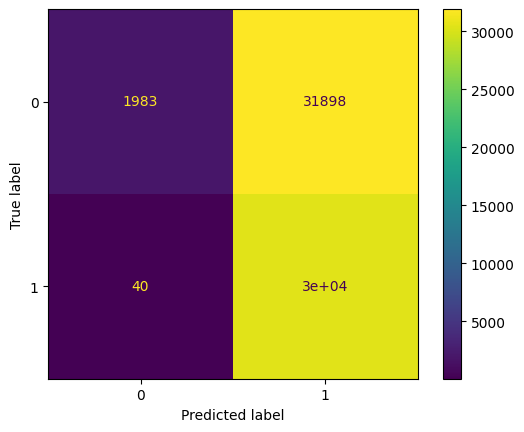

In [118]:
rForest = RandomForestClassifier()
rForest.fit(x_train, y_train)

y_pred = rForest.predict(x_test) #Making predictions on test set to evaluate any possible overfitting

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1_score}')

display = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
)
plt.show()

## Model Selection

All models have already been run on the test set to gather the metrics.
With these metrics, GuassianNB has been chosen as it has the best accuracy out of them all.

## Prediciton of New Data

In [119]:
filename = input("Enter your csv file with new customers: ") #Supply a new unseen customer dataset (without churn)
df = pd.read_csv(filename)
removeCustomerID(df)
removeNaN(df)
df = oneHotEncoding(df)

y_pred = gnb.predict(df)
print('Prediction: ', y_pred)

Prediction:  [0. 1. 1. 1. 1.]
